# Про функции и точки
Класс LabFunc представляет обертку над функциями с их производными. Между функциями, а также парой функция-число, можно выполнять любые арифметические операции: сложение, вычитание, умножение, деление, возведение в степень. Результатом операции является новый объект LabFun.

Варианты определения функций:

1. В конструктор передается выполняемая строка (скармливается потом в eval), словарь с производными: 
ключ - имя переменной, значение - выполняемая строка, опционально передается перечень аргументов.
Если набор аргументов не передан, то будет взят набор ключей словаря. Но словарь с производными может содержать не все производные. При попытке получить не заданную производную будет возвращен 0.

2. Определить функции-переменные через Identity. Далее все операции проводить над ними, через доступный набор преобразований

In [3]:
import numpy as np
from LFlow.labos_flow_v2 import *
#from LFlow.labos_point import Point

In [4]:
"""
примеры
"""
f1 = LabFunc('x1**2 - 2*x1*x2', derivatives={'x1': '2*x1 - 2*x2', 'x2' : '-2*x2'}, args=['x1', 'x2'])
f2 = LabFunc('np.sin(t)', {'t' : 'np.cos(t)'})
x1 = Identity('x1')
x2 = Identity('x2')
f3 = LabExp(x1+x2)


Аргумент для LabFunc - словарь или Point. Point предпочтителен.

Класс Point - обертка над словарем. Ключи словаря - имена переменных, значения - числа или numpy массивы. Numpy массив должен быть двумерным размера (n, 1), иначе лезут косяки с векторизацией.

Точки поддерживают набор операций:

1. Сложение точек. Результат - точка с объединенным набором координат, значения общих координат складываются, то есть можно сложить точку с координатами (x1, x2, x3) и (x1, x3)

2. Вычитание точек

3. Умножение на число слева и справа.

4. Умножение на массив значений справа, т.е. Point*[1,2,3]. Результат - набор точек, умноженных на соответствующие числа, обратный порядок умножения приводит к нелепым результатам.

5. Деление точки на число

6. Вычисление L2-нормы

7. Вычисление косинуса угла между точками (только по общим координатам)



In [5]:
p1 = Point({'x1' : 1., 'x2' : 1.})
p2 = Point({'x1' : 2., 'x2' : 3.})
p3 = Point({'x1' : 0., 'x2' : 0.})
sample = {'x1' : np.array([1,2,3,4,5,6]).reshape(6,1), 'x2' : np.array([1,2,3,4,5,6]).reshape(6,1)}
sample2 = {'x1' : np.array([0,1,0,1]).reshape(4,1), 'x2' : np.array([1,0,1,0]).reshape(4,1)}
print('p1+p2:', end=' ')
print(p1+p2)
print('p1.cos(p2):', end=' ')
print(p1.cos(p2))
print('p1.norm():', end=' ')
print(p1.norm())
print('f3(p2):', end=' ')
print(f3(p2))
print('')
print('f3(sample2)', end=' ')
print(f3(sample2))

p1+p2: {'x1': 3.0, 'x2': 4.0}
p1.cos(p2): 0.98058067569092
p1.norm(): 1.4142135623730951
f3(p2): 148.4131591025766

f3(sample2) [[2.71828183]
 [2.71828183]
 [2.71828183]
 [2.71828183]]


## Поддерживаемые операции и преобразования
***
**LabSum** - обертка над суммой произвольного числа функций. При сложении двух объектов LabFunc получается объект класса LabSum. При сложении LabSum с LabFunc или LabSum - аргументы объединяются, то есть граф вычислений становится не бинарным деревом.

LabSum(f1, f2, f3, ...)

***
**LabProd** - обертка над произведением произвольного числа функций. При умножение двух объектов LabFunc получается объект класса LabProd. При умножении LabProd с LabFunc или LabProd - аргументы объединяются, то есть граф вычислений становится не бинарным деревом.

LabProd(f1, f2, f3, ...)

***
**LabMax, LabMin** - обертка над максимумом/минимумом произвольного числа функций. Производные не определены

**LabSmoothmax, LabSmoothmin** - обертка над аппроксимацией максимума/минимума произвольного числа функций

LabSmoothmax(f1, f2, ..., fn, theta=10)
***

**LabIndicator** - функция Хевисайда, производная везде будет равна нулю (сингулярность игнорируем)

**LabSigmoid** - сигмоида, используется как дифференцируемое приближение индикатора

LabSigmoid(f1, theta=10)

***

### Поддерживаемые нелинейные функции
* LabSin
* LabCos
* LabExp
* LabArctg - арктангенс
* LabLog - натуральный логарифм



### Градиент
Градиент функции в точке - объект класса Point. Значит его можно складывать с точками и получать новые точки.

In [6]:
print('f3.deriv(p1)', end=' ')
print(f3.deriv(p1))
print('f3.deriv(sample)', end=' ')
print(f3.deriv(sample))

f3.deriv(p1) {'x1': 7.38905609893065, 'x2': 7.38905609893065}
f3.deriv(sample) {'x1': array([[7.38905610e+00],
       [5.45981500e+01],
       [4.03428793e+02],
       [2.98095799e+03],
       [2.20264658e+04],
       [1.62754791e+05]]), 'x2': array([[7.38905610e+00],
       [5.45981500e+01],
       [4.03428793e+02],
       [2.98095799e+03],
       [2.20264658e+04],
       [1.62754791e+05]])}


# Определения и постановки задач вероятностной оптимизации
Пусть имеется функционал $\Phi(u, X)$, где $u\in R^n$ -- вектор управления, $X \in R^m$ -- вектор случайных параметров. Будем считать, что $\Phi(u, X)$ определяет случайные потери при заданном управлении. Распределение вектора случайных параметров будем считать абсолютно непрерывным, то есть имеющим плотность $f_X: R^m \to 1$


Введем в рассмотрение функцию вероятности и функцию квантили
\begin{gather}
P_{\varphi}(u) \triangleq P\{\Phi(u, X) \le \varphi\},\\
q_{\alpha}(u) \triangleq \min\{\varphi: P_{\varphi}(u) \ge \alpha\}
\end{gather}
Исходя из физического смысла $\Phi(u, X)$ будем рассматривать задачи максимизации функции вероятности и минимизации функции квантили
\begin{gather}
u^* = argmax_{u\in U}P_{\varphi}(u),\\
u^* = argmin_{u\in U}q_{\alpha}(u)
\end{gather}

Одной из проблем, возникающих при решении этих задач, является отсутствие явного выражения для производных этих критериев, а для функции квантили - еще и отсутствие аналитического выражения для ее вычисления.

## Гладкая аппроксимация функции вероятности
Все выкладки и доказательства можно посмотреть здесь
http://www.mathnet.ru/links/377dc64419dd1d66b237c6d62cb2ea11/trspy1096.pdf

Запишем вероятность в следующем виде
$$
P_{\varphi}(u) = P\{\Phi(u, X) \le \varphi\} = E\left[I(\varphi - \Phi(u, X))\right],
$$
где $I$ - функция Хевисайда. В случае абсолютно непрерывного распределения, при непосредственном дифференцировании этого выражения по $u$ или $\varphi$ получим интеграл, включающий в себя дельта-функцию Дирака.

Вместо этого, заменим функцию Хевисайда на ее гладкое приближение - сигмоиду:
$$
S_\theta(x) = \frac{1}{1+e^{-\theta x}}
$$
Нетрудно показать, что $S_\theta(x) \to I(x)$ при $\theta\to\infty$, для любого $x\neq 0$.

Введем приближенную функцию вероятности
$$
P^\theta_{\varphi}(u) = E\left[S_\theta(\varphi - \Phi(u, X))\right]
$$

Доказано, что если $\Phi(u,X)$ дифференцируема по компонентам вектора u, а также выполняется условие
$$
P(\Phi(u, X) = \varphi) = 0, \forall \varphi 
$$

то
\begin{gather}
P^\theta_{\varphi}(u) \to P_{\varphi}(u) \mbox{ при } \theta\to\infty,\\
\frac{\partial}{\partial u_i}P^\theta_{\varphi}(u) \to \frac{\partial}{\partial u_i}P_{\varphi}(u) \mbox{ при } \theta\to\infty,\\
\frac{\partial}{\partial \varphi}P^\theta_{\varphi}(u) \to \frac{\partial}{\partial \varphi}P_{\varphi}(u) \mbox{ при } \theta\to\infty
\end{gather}

При этом
$$
\frac{\partial}{\partial u_i}P^\theta_{\varphi}(u) = E\left[-\theta S_\theta(\varphi - \Phi(u, X))(1-S_\theta(\varphi - \Phi(u, X)))\frac{\partial}{\partial u_i}\Phi(u, X)\right]
$$
$$
\frac{\partial}{\partial \varphi}P^\theta_{\varphi}(u) = E\left[\theta S_\theta(\varphi - \Phi(u, X))(1-S_\theta(\varphi - \Phi(u, X)))\right]
$$

## Гладкая аппроксимация функции квантили
Для функции квантили явного выражения в общем виде как не было, так и нет. Но получены аппроксимации ее производных, при тех же условиях. 

По управлению
$$
\frac{\partial}{\partial u_i}q^\theta_{\alpha}(u) = \frac{E\left[\theta S_\theta(q^\theta_{\alpha}(u) - \Phi(u, X))(1-S_\theta(q^\theta_{\alpha}(u) - \Phi(u, X)))\frac{\partial}{\partial u_i}\Phi(u, X)\right]}{E\left[\theta S_\theta(q^\theta_{\alpha}(u) - \Phi(u, X))(1-S_\theta(q^\theta_{\alpha}(u) - \Phi(u, X)))\right]}
$$

По уровню вероятности
$$
\frac{\partial}{\partial \alpha}q^\theta_{\alpha}(u) = \frac{1}{E\left[\theta S_\theta(q^\theta_{\alpha}(u) - \Phi(u, X))(1-S_\theta(q^\theta_{\alpha}(u) - \Phi(u, X)))\right]}
$$

# Аппроксимация максимума и минимума
В некоторых задачах, функция потерь представляется как максимум из набора линейных функций (см. работы Иванов/Наумов/Кибзун)
$$
\Phi(u, X) = \max\limits_{i=1,\ldots,n}\{A_i^Tu + B_i^TX + c_i\}
$$
Такая функция не является гладкой. Но ее можно сгладить и сделать всюду дифференцируемой, если перейти к преобразованию гладкого максимума (smooth maximum)

Формулы для максимума и минимума двух функций:
\begin{equation}
softmax(f_1(x), f_2(x)) = \frac{f_1(x)e^{\theta f_1(x)} + f_2(x)e^{\theta f_2(x)}}{e^{\theta f_1(x)} + e^{\theta f_2(x)}}
\end{equation}
\begin{equation}
softmin(f_1(x), f_2(x)) = \frac{f_1(x)e^{-\theta f_1(x)} + f_2(x)e^{-\theta f_2(x)}}{e^{-\theta f_1(x)} + e^{-\theta f_2(x)}}
\end{equation}

На случай 3 и более функций обобщается непосредственно: добавляются слагаемые в числитель и знаменатель.

### Производные
По-хорошему, производную максимума нужно аппроксимировать как
\begin{equation}
\frac{d}{dx}\max(f_1(x), f_2(x)) = 
\frac{f'_1(x)e^{\theta f_1(x)} + f'_2(x)e^{\theta f_2(x)}}
{e^{\theta f_1(x)} + e^{\theta f_2(x)}}
\end{equation}
Но это не является производной гладкого максимума.

Если посчитать в явном виде производную softmax, получим
\begin{multline}
\frac{d}{dx}softmax(f_1(x), f_2(x)) = \frac{f'_1(x)e^{\theta f_1(x)} + f'_2(x)e^{\theta f_2(x)}}
{e^{\theta f_1(x)} + e^{\theta f_2(x)}} +
\theta e^{\theta f_1(x)}e^{\theta f_2(x)}
\frac{\left(f'_1(x) - f'_2(x)\right)(f_1(x)-f_2(x))}
{\left(e^{\theta f_1(x)} + e^{\theta f_2(x)}\right)^2}
\end{multline}


Первое слагаемое в точности совпадает со сглаженной производной максимума. Второе слагаемое стремится к нулю при $\theta\to\infty$. 

In [7]:
theta = 5

x = Identity('x')

fun1 = LabSin(x)
fun2 = LabCos(x)

hardmax = LabMax(fun1, fun2)
softmax = LabSmoothmax(fun1, fun2, theta=theta)



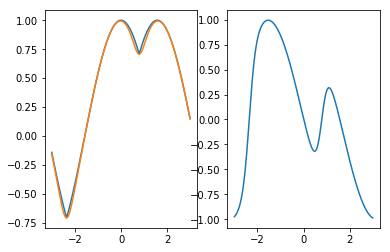

In [8]:
xs = Point({'x' : np.arange(-3, 3, 0.01).reshape(-1,1)})
hard = hardmax(xs)
soft = softmax(xs)
soft_d = softmax.deriv(xs)['x']
    
ax1 = plt.subplot(1,2,1)
ax1.plot(xs['x'], hard)
ax1.plot(xs['x'], soft)
ax2 = plt.subplot(1,2,2)
#ax2.plot(xs, hard_d)
ax2.plot(xs['x'], soft_d)
plt.show()